In [239]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pickle as pk
import time as tm
from sklearn.model_selection import train_test_split

In [240]:

## Import the Data
path = '/Users/james/projects/ml_model_web/model_dev/data/holding'
df_tgt = pd.read_csv(path+'/tgt.csv')
df_train = pd.read_csv(path+'/preds.csv')
df_tgt

,beer_style
0,Hefeweizen
1,English Strong Ale
2,Foreign / Export Stout
3,German Pilsener
4,American Double / Imperial IPA
...,...
1518473,Pumpkin Ale
1518474,Pumpkin Ale
1518475,Pumpkin Ale
1518476,Pumpkin Ale


In [241]:
df_train

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,'t Hofbrouwerijke,(512) Brewing Company,10 Barrel Brewing Co.,1516 Brewing Company,...,Åsundens Bryggeri,Ægir Bryggeri,Ölands Gårdsbryggeri,Ölgerð Reykjavíkur,Ölgerðin Egill Skallagrímsson,Ölvisholt Brugghús,Öufi Brauerei,Ølfabrikken,Ørbæk Bryggeri,Łódzkie Browary S.A.
0,1.5,2.0,2.5,1.5,1.5,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.5,3.0,3.0,3.0,6.2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.5,3.0,3.0,3.0,6.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,3.0,3.5,2.5,3.0,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,4.5,4.0,4.0,4.5,7.7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346555,4.0,3.5,4.0,4.0,3.5,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346556,4.5,4.0,4.0,4.0,4.5,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346557,4.0,4.5,4.0,3.5,4.5,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346558,3.5,4.0,3.0,4.0,4.0,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [242]:
## transform the target for classification 
df_tgt_ohe = pd.get_dummies(df_tgt['beer_style'])
df_tgt_ohe_a = np.array(df_tgt_ohe)

In [243]:
df_tgt_ohe_a

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [244]:
## Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(df_train, df_tgt_ohe_a, test_size = .25, random_state = 46)
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

ValueError: Found input variables with inconsistent numbers of samples: [346560, 1518478]

In [229]:
## Build the model
model = keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(104, activation = 'softmax')
])

In [230]:
## Compile the model 

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [231]:
## partial train data

X_val = X_train[:100000]
partial_X_train = X_train[100000:]
y_val = y_train[:100000]
partial_y_train = y_train[100000:]

In [232]:
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs = 10,
                   batch_size = 512,
                   validation_data = (X_val, y_val))

Epoch 1/10
2030/2030 [==============================] - 10s 5ms/step - loss: 3.4761 - accuracy: 0.1577 - val_loss: 3.4408 - val_accuracy: 0.1550
Epoch 2/10
2030/2030 [==============================] - 10s 5ms/step - loss: 3.3333 - accuracy: 0.1780 - val_loss: 3.4183 - val_accuracy: 0.1637
Epoch 3/10
2030/2030 [==============================] - 11s 5ms/step - loss: 3.3045 - accuracy: 0.1822 - val_loss: 3.2764 - val_accuracy: 0.1871
Epoch 4/10
2030/2030 [==============================] - 11s 5ms/step - loss: 3.2878 - accuracy: 0.1854 - val_loss: 3.3304 - val_accuracy: 0.1766
Epoch 5/10
2030/2030 [==============================] - 11s 5ms/step - loss: 3.2772 - accuracy: 0.1866 - val_loss: 3.3821 - val_accuracy: 0.1710
Epoch 6/10
2030/2030 [==============================] - 11s 5ms/step - loss: 3.2689 - accuracy: 0.1882 - val_loss: 3.3070 - val_accuracy: 0.1851
Epoch 7/10
2030/2030 [==============================] - 9s 5ms/step - loss: 3.2621 - accuracy: 0.1890 - val_loss: 3.3330 - val_acc

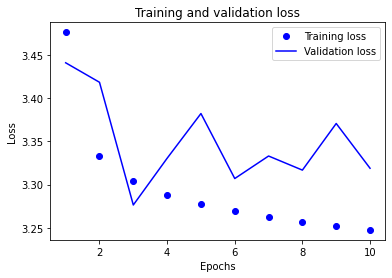

In [233]:
from matplotlib import pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

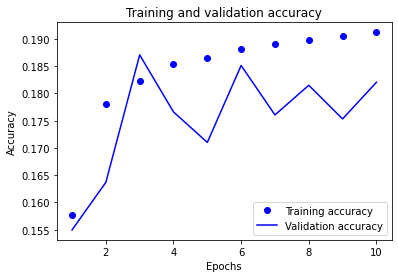

In [234]:
plt.clf()                          
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [235]:
## Train a new model at the point of overfitting ~~ around 3 epochs 

history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs = 3,
                   batch_size = 512,
                   validation_data = (X_val, y_val))

results = model.evaluate(X_test, y_test)

results

Epoch 1/3
2030/2030 [==============================] - 9s 4ms/step - loss: 3.2438 - accuracy: 0.1916 - val_loss: 3.2578 - val_accuracy: 0.1908
Epoch 2/3
2030/2030 [==============================] - 9s 4ms/step - loss: 3.2408 - accuracy: 0.1920 - val_loss: 3.2860 - val_accuracy: 0.1858
Epoch 3/3
11864/11864 [==============================] - 7s 608us/step - loss: 3.3094 - accuracy: 0.1809


[3.3094277381896973, 0.1809072196483612]

In [237]:
## Determine the base level accuracy for a random classification in the data set
import random
random.seed(46)
import copy
test_labels_copy = copy.copy(labels)
np.random.shuffle(test_labels_copy)
hit_array = np.array(labels) == np.array(test_labels_copy)
print('The accuracy of a random choice is :',hit_array.mean()*100, '%')

The accuracy of a random choice is : 2.8846153846153846 %
